<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/ICP06_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is ICP06 for python lession.**

**Created by - Prabhanjan Trivedi**

**Topic covered  - KMeans Clustering, Scaling and PCA**

In [3]:
#importing all required libraries 
import pandas as pd
import numpy as np
from google.colab import files
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
#ML libraries
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA

**Question 1** - Apply K means clustering in this data set provided below:
https://umkc.box.com/s/a9lzu9qoqfkbhjwk5nz9m6dyybhl1wqy

• Remove any null values by the mean.

• Use the elbow method to find a good number of clusters with the KMeans algorithm.

csv file from given url is downloaded and saved in local.

In [4]:
#uploading the file from local drive to goggle colab
uploaded = files.upload()

Saving CC.csv to CC.csv


In [27]:
#reading the file in dataframe 
df = pd.read_csv('CC.csv')

In [28]:
#size of input data
df.shape

(8950, 18)

In data, we have 8950 rows and 18 columns.

In [29]:
#display top 5 rows in dataframe
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


We can drop first column as it is unique id for each row or unique customer id which will not help in data anlysis.

In Pandas dataframe, axis =0 represents rows and axis  = 1 represents columns.

Inplace = True, it makes changes in same dataframe and doesn't create a new df.

In [30]:
df.drop(['CUST_ID'], axis=1, inplace= True)

In [31]:
#recheck size of dataframe
df.shape

(8950, 17)

In [32]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

From above information , we can see that columns 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' have total null values 1 and 313 respectively.

In [33]:
#replacing null values from average value of the columns.
df  = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [34]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

It shows that there is no null values in dataframe now.

**Elbow method -** The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

Then plot a graph between SSE and k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

In [35]:
'''A funtion to plot the elbow of passed dataset 
purpose : Elbow method to know the number of clusters in dataset through plot
'''
def elbow(dataset):
  wcss = [] ##Within Cluster Sum of Squares
  for i in range(1,10):
    kmeans = KMeans(n_clusters=i, max_iter= 300,random_state= 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1,10),wcss) 
  plt.title('The elbow method') 
  plt.xlabel('Number of Clusters') 
  plt.ylabel('Wcss - K mean score')
  plt.show()

In [36]:
'''A function to model k means to passed dataset.
pupose : Applying K-means Clustering to dataset
'''
def kmeans(nclusters, dataframe):
  seed = 0
  km = KMeans(n_clusters= nclusters, random_state= seed )
  #fitting the data in model
  km.fit(dataframe)
  #predict the cluster for each data point in dataframe
  y_kmeans = km.predict(dataframe)
  cent = km.cluster_centers_
  return (y_kmeans, cent)

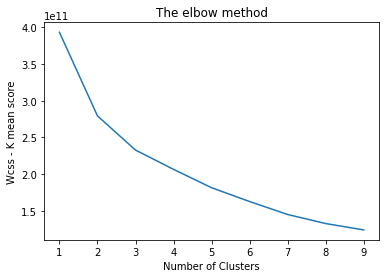

In [37]:
#calling elbow function on raw data
elbow(df)

**Above Elbow method suggests that good number of clusters over raw dataset could be 3.**


In [38]:
#Kmeans modeling over raw data
nclusters = 3
y_cluster_kmeans, cent = kmeans(nclusters, df)

In [39]:
#inserting kmeans out put in dataframe for plotting purpose
new_df = df 
kmeans_raw = pd.DataFrame(y_cluster_kmeans)
new_df.insert((new_df.shape[1]),'kmeans_raw',kmeans_raw)

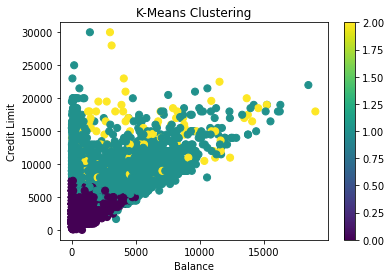

In [40]:
#Plotting the clusters obtained using k means considering two features in plotting over raw data.
#Here we are plotting for 'balance' and credit_limit'. 
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['BALANCE'],new_df['CREDIT_LIMIT'],
                     c=kmeans_raw[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Balance')
ax.set_ylabel('Credit Limit')
plt.colorbar(scatter)

**Question 2 -**Calculate the silhouette score for the above clustering

In [60]:
#calculating silhouette score on raw data 
score = metrics.silhouette_score(df, y_cluster_kmeans)
print('Silhouette score of given data set with {} clusters is {}'.format(nclusters, score))

Silhouette score of given data set with 3 clusters is 0.4660414313520223


The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
We can say that the clusters are well apart from each other as the silhouette score is closer to 1.

**Question 3 -** Try feature scaling to see if it will improve the Silhouette score.

Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.

In [42]:
#scaling the given data set using standardscaler method
scaler = preprocessing.StandardScaler()
scaler.fit(df)
df_scaled_array = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns = df.columns)

In [63]:
#view of data after scaling
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_raw
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,-0.59075
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,1.48023
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1.48023
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068,1.48023
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,-0.59075


Now we have dataset after scaling, new data set name is df_scaled.
Now, We will find number of clusters on these dataset using elbow method. 

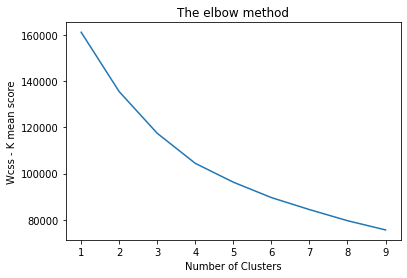

In [43]:
#elbow method to know the number of clusters in scaled dataset
elbow(df_scaled)

**Above Elbow method suggets that good number of clusters in scaled dataset could be 4.**

In [61]:
#Kmeans modeling over scaled dataset
nclusters = 4
y_cluster_scaled_kmeans, cent = kmeans(nclusters, df_scaled)

In [62]:
#Calculting silhouette score on sacled dataset
score_scaled = metrics.silhouette_score(df_scaled, y_cluster_scaled_kmeans)
print('Silhouette score of given data set after scaling with {} clusters is {}'.format(nclusters, score_scaled))

Silhouette score of given data set after scaling with 4 clusters is 0.19642331145367162


**Silhouette score of given data set after scaling has been decreased.**A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. 

We have seen that score is decreased after scaling means data points are so closed now after scaling and clusters are overlapping.

**Question 4 -  Apply PCA on the same dataset.**

In [64]:
''' A funtion is writen to creat and fit a PCA model
'''
def pcamodel(n_comp, dataframe):
  #Instance model for PCA
  pca = PCA(n_components=n_comp)
  #fitting dataset without scaled
  df_pca = pca.fit_transform(dataframe)
  data_pca = pd.DataFrame(data=df_pca)
  return data_pca

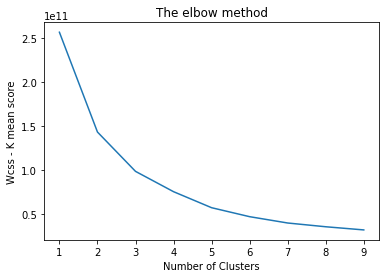

In [65]:
# calling Pca model on raw data to get new dataframe
df_pca = pcamodel(2, df)
#elbow method to know the number of clusters in pca dataset
elbow(df_pca)

**Above Elbow method suggets that good number of clusters in dataset could be 3.**

In [48]:
#Applying K-means Clustering to dataset after pca
nclusters = 3
y_cluster_pca_kmeans, cent = kmeans(nclusters, df_pca)

In [71]:
# score after PCA on raw data
score_pca = metrics.silhouette_score(df_pca, y_cluster_pca_kmeans)
print('Silhouette score of given data set after PCA with {} clusters is {}'.format(nclusters, score_pca))

Silhouette score of given data set after PCA with 3 clusters is 0.572000319181534


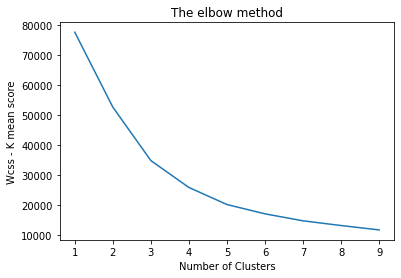

In [67]:
#fitting scaled datset to PCA model
df_scaled_pca = pcamodel(2, df_scaled)
#elbow method to know the number of clusters in pca dataset after scaling
elbow(df_scaled_pca)

**Above Elbow method suggets that good number of clusters in dataset could be 3.**

In [68]:
#Applying K-means Clustering to dataset after pca and scaling
nclusters = 3
y_cluster_scaled_pca_kmeans, cent = kmeans(nclusters, df_scaled_pca)

In [72]:
#score claultion for scaled and then PCA dataset
score_scaled_pca = metrics.silhouette_score(df_scaled_pca, y_cluster_scaled_pca_kmeans)
print('Silhouette score of given data set after scaling with {} clusters is {}'.format(nclusters, score_scaled_pca))

Silhouette score of given data set after scaling with 3 clusters is 0.4747553308476319


<function matplotlib.pyplot.show>

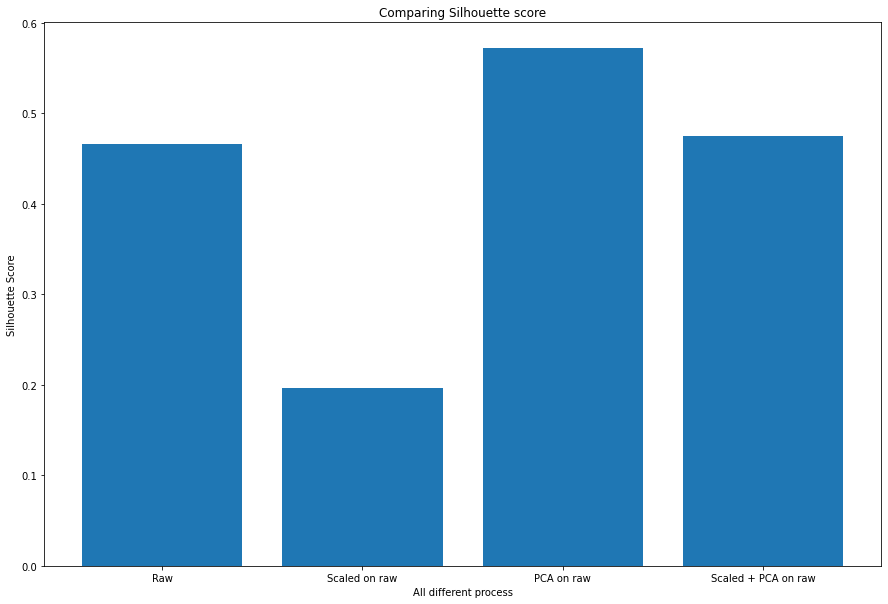

In [77]:
#Here we are plotting score to each case 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
process = ['Raw', 'Scaled on raw', 'PCA on raw', 'Scaled + PCA on raw']
sh_score = [score, score_scaled, score_pca, score_scaled_pca]
plt.bar(process, sh_score)
ax.set_title('Comparing Silhouette score')
ax.set_xlabel('All different process')
ax.set_ylabel('Silhouette Score')
plt.show

In [78]:
#printing size of scaled +PCA data and its cluster after kmeans
print(df_scaled_pca.shape)
print(y_cluster_scaled_pca_kmeans.shape)

(8950, 2)
(8950,)


In [79]:
#creating a new dataset for plotting the clusters
final_df = df_scaled_pca
kmeans_final = pd.DataFrame(y_cluster_scaled_pca_kmeans)
final_df.insert((final_df.shape[1]),'kmeans',kmeans_final)


In [80]:
#view of final dataset
final_df.head()

,0,1,kmeans
0,-1.960295,-0.698346,0
1,-0.114762,3.037128,2
2,1.296560,-0.228141,0
3,-0.331713,0.683585,0
4,-1.809145,-0.360487,0


In [81]:
#Naming the columns
final_df.columns = ['feature1', 'feature2', 'cluster']

In [82]:
#data view
final_df.head()

,feature1,feature2,cluster
0,-1.960295,-0.698346,0
1,-0.114762,3.037128,2
2,1.296560,-0.228141,0
3,-0.331713,0.683585,0
4,-1.809145,-0.360487,0


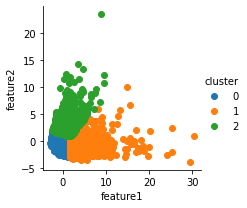

In [85]:
#plotting the graph after scaling and then PCA on Dataset
# Number of features after PCA = 2
# Number of clusters in Kmeans = 3
sns.FacetGrid(final_df, hue="cluster").map(plt.scatter, "feature1", "feature2").add_legend()
plt.show()